## Laboratorium 4

### Cel ćwiczenia
Celem ćwiczenia jest zastosowanie metody selekcji cech w klasyfikacji liści, a następnie przeprowadzenie klasyfikacji za pomocą klasyfikatora *k*NN.
Dodatkowo należy wyświetlić wyniki klasyfikacji w postaci macierzy pomyłek.

### Zbiór danych

Zbiór danych znajduje się w katalogu `dataset/*`. Jest to zmodyfikowany zbiór danych znajdujący się pod adresem: <https://archive.ics.uci.edu/ml/datasets/leaf>.

### Przesyłanie zadań

Wszystkie pliki należy spakować archiwizatorem **zip** i przesłać za pośrednictwem platformy WIKAMP. Poniżej oczekiwana zawartość archiwum:

```
+-- 📂 [IMIE.NAZWISKO].zip
    +-- 📜 Lab[xx].ipynb
    +-- 📂 dataset
        +-- 📜 dataset.npz
        +-- 📜 ReadMe.pdf
```



### Zadanie 1

* Wybierz 10 pierwszych gatunków liści (będziesz je używać w kolejnych zadaniach) o identyfikatorach: 1, 2, 3, 4, 5, 6, 7, 8, 9, 10.
* Znormalizuj dane w zakresie 0-1.

In [5]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler

with open('./dataset/dataset.npz', 'rb') as f:
    data = np.load(f)
    train, test = data['train'], data['test']

features = list(range(2, 16))
classes = list(range(1, 11))

mask = np.isin(train[:,0], classes)

X_train = train[mask]
X_train = X_train[:, features]

Y_train = train[mask]
Y_train = Y_train[:, 0]

mask = np.isin(test[:,0], classes)
X_test = test[mask]
X_test = X_test[:, features]

Y_test = test[mask]
Y_test = Y_test[:, 0]

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



### Zadanie 2
* Przeprowadź selekcję cech.
> Możesz wykorzystać bibliotekę [scikit-learn](https://scikit-learn.org/stable/modules/feature_selection.html) (np. [SelectKBest](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest)).
* Dla każdej liczby cech (1-14) przeprowadz selekcje cech. Nastepnie wykonaj klasyfikacje klasyfikatorem *k*NN i znajdź optymalne *k*.
* Wyświetl wykres, gdzie na osi X znajduje się liczba cech, a na osi Y najwyższa osiągnięta dokładność (*accuracy*).
* Podaj dla jakiej liczby cech (i dla których cech) oraz dla jakiego *k* osiągnąłeś najlepszy wynik (*accuracy*).


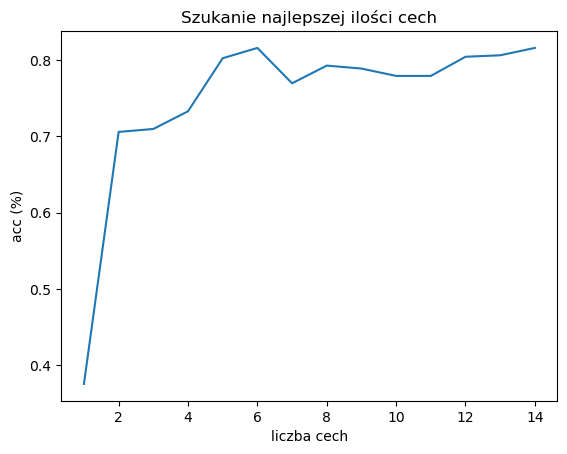

Najlepsza liczba cech: 6 -> 81.62%


In [6]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

scores = []
for i in range(1, 15):
    k_best = SelectKBest(score_func=f_classif, k=i)
    X_train_transformed = k_best.fit_transform(X_train_scaled, Y_train)
    X_test_selected = k_best.transform(X_test_scaled)
    score = []

    for n in range(1, 50):
        knn = KNeighborsClassifier(n_neighbors=n)
        knn.fit(X_train_transformed, Y_train)
        Y_pred = knn.predict(X_test_selected)
        accuracy = accuracy_score(Y_test, Y_pred)
        score.append(accuracy)
        
    scores.append(max(score))

plt.plot(list(range(1,15)), scores, label='Wyniki')
plt.xlabel('liczba cech')
plt.ylabel('acc (%)')
plt.title('Szukanie najlepszej ilości cech')
plt.show()

print(f'Najlepsza liczba cech: {scores.index(max(scores)) + 1} -> {max(scores)*100:.2f}%')


### Zadanie 3
* Wyświetl tablicę pomyłek.

> Podpowiedź: Do wyświetlenia tablicy pomyłek możesz użyć funkcji [`confusion_matrix`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) oraz [`ConfusionMatrixDisplay`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) z biblioteki `sklearn`.

**Pamiętaj, wyniki powinny być czytelnie opisane oraz zaprezentowane graficznie (jeżeli jest taka możliwość).**

Przykład czego nie robić (na podstawie tablicy pomyłek):

**Źle** (kolumny ani wiersze nie są opisane):
```
array([[2, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])
```



Accuracy: 81.62%


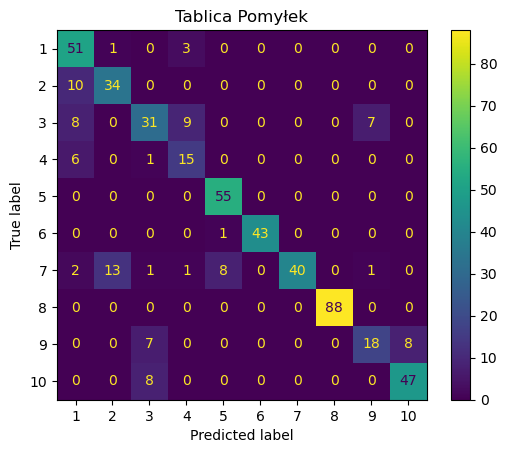

In [7]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

k_best = SelectKBest(score_func=f_classif, k=6)
X_train_transformed = k_best.fit_transform(X_train_scaled, Y_train)
X_test_selected = k_best.transform(X_test_scaled)

knn = KNeighborsClassifier(n_neighbors=16)
knn.fit(X_train_transformed, Y_train)
Y_pred = knn.predict(X_test_selected)

cm = confusion_matrix(Y_test, Y_pred, labels=classes)

print(f'Accuracy: {accuracy_score(Y_test, Y_pred)*100:.2f}%')

display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
display.plot()
plt.title("Tablica Pomyłek")
plt.show()